In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('goodreads_train.csv')
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
def users_0(df, users_0_test = []):
    """ Esta funcion borra los review 0 de los usuarios que
        mas 0 ponen y devuelve el nuevo dataset junto con una
        black list, pero si le entregas una black list de
        borra todos los elementos que correspondan a los
        usuarios de esa blacklist.
    """
    
    if users_0_test == []:
        x, y = [], []
        elements = df.query('rating == 0').user_id.value_counts()

        users_0 = []
        users_0_ = []
    
        efective_el = []
        for i in elements.iteritems():
            if i[1] > 20:
                efective_el.append(i)

        for j,i in enumerate(elements.iteritems()):
            if i[1] > 20:
                val = df[df.user_id.str.contains(i[0])].rating.value_counts().sort_index().values
        
                if val[0]/sum(val) > 0.5 and sum(val) > 35:
                    users_0.append(i[0])
                else:
                    users_0_.append(i[0])
                x.append(val[0])
                y.append(val[0]/sum(val))
                print(str(round((j/len(efective_el)*100))) + '%', end='\r')
    
        plt.figure(figsize=(10,6))
        plt.plot(x,y,'o')
        plt.xlabel('cantidad de reviews 0')
        plt.ylabel('% respecto al total')
        plt.show()
        
        del_users_0 = df[df.rating.eq(0)]
        for user in users_0:
            indexs = del_users_0[del_users_0.user_id.str.contains(user)].index
            df.drop(indexs, inplace=True)
        return df, users_0
    
    else:
        for n,user in enumerate(users_0_test):
            if n == 0:
                df_0 = df[df.user_id.str.contains(user)]
            else:
                df_0 = pd.concat([df_0,df[df.user_id.str.contains(user)]])
        return df_0.sort_index()
        

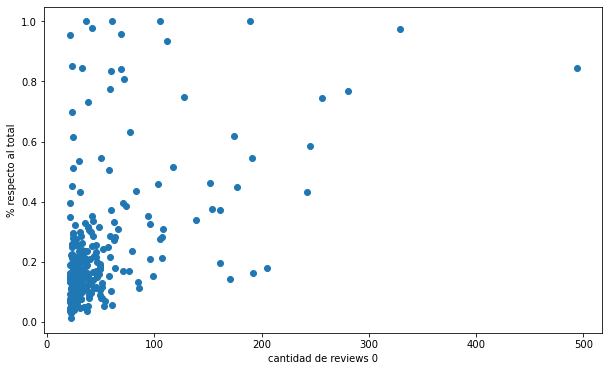

In [4]:
df, blacklist = users_0(df)

In [7]:
epep = df[df.rating.eq(0)].review_text

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

index_0 = []

no_index_0 = []

for j in epep.iteritems():
    scores = sia.polarity_scores(j[1])
    compound = scores['compound']
    
    if compound < 0.2:
        index_0.append(j[0])
    else:
        no_index_0.append(j[0])

print(len(indx_0))

In [25]:
df.drop(pd.Index(no_index_0), inplace=True)
df.query('rating == 0').user_id.value_counts().iteritems()